Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Fuel Type   2) capacity_mw

In [326]:
#common lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprecessing Lib
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

#outliars and skewness
from scipy import stats
from sklearn.preprocessing import power_transform

#multicoliniarity lib
from statsmodels.stats.outliers_influence import variance_inflation_factor

#model lib
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR


#Model building lib for classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC


#Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,confusion_matrix,plot_roc_curve
import scikitplot as skplt

#model cross validation
from sklearn.model_selection import cross_val_score

#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [327]:
#importing the dataset into dataframe
df=pd.read_csv('GlobalPowerPlant.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [328]:
#checking the shape of dataframe
df.shape
#the data frame has 908 rows and 25 columns

(908, 25)

In [329]:
#this is basically used to display the complete row of dataframe
pd.set_option('display.max_rows',None)

In [330]:
df.info()
#Here there is the datatypes consist of object,float64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [331]:
#checking the null value in the dataframe
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [332]:
#there is lots of null value present in the multiple features.
#delete the features which having more than 50% null values.(50% is 454)
#estimated_generation_gwh,generation_data_source,generation_gwh_2017,generation_gwh_2015,generation_gwh_2014,generation_gwh_2013
#wepp_id,owner,other_fuel1,other_fuel2,other_fuel3.

In [333]:
#dropping the columns which having more than 50% null values.
df=df.drop(columns=['estimated_generation_gwh','generation_data_source','generation_gwh_2017','generation_gwh_2016','generation_gwh_2015','generation_gwh_2014','generation_gwh_2013','wepp_id','owner','other_fuel1','other_fuel2','other_fuel3'],axis=1)

In [334]:
#latitude(mean),longitude(mean)
#commissioning_year,geolocation_source MOD ,year_of_capacity_data MOD
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [335]:
#filling the null value with mean and mod values:
df['latitude']=df['latitude'].fillna(df['latitude'].median())
df['longitude']=df['longitude'].fillna(df['longitude'].median())

df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [336]:
#checking the null value in the dataframe after removing all the null values
df.isna().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
dtype: int64

In [337]:
#there is no null values in the features.
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2013.0,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0


In [338]:
#checking the new shape of data.
df.shape

(908, 13)

In [339]:
#the new shape is 908 rows and 13 columns

In [340]:
#discribe the dataframe
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data
count,908.000000,908.000000,908.000000,908.000000,908.0
mean,321.046378,21.225679,77.410936,2003.624449,2018.0
std,580.221767,6.089450,4.783873,15.238021,0.0
min,0.000000,8.168900,68.644700,1927.000000,2018.0
25%,16.837500,17.057825,74.390250,1997.000000,2018.0
50%,60.000000,21.778300,76.719250,2013.000000,2018.0
75%,388.125000,25.183775,79.211600,2013.000000,2018.0
max,4760.000000,34.649000,95.408000,2018.000000,2018.0


In [341]:
#here we can see that the mean and median(50%) not looks normal so there is outliers is availble in the features.
#the Standerd daviatian is also not look normal.

In [342]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2013.0,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0


In [343]:
#country,country_long,name,gppd_idnr,primary_fuel,source,url,geolocation_source
#source,url,geolocation_source
df['geolocation_source'].value_counts() 

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [344]:
#encoding the catagorical data using label encoding
lb=LabelEncoder()

lb_var=['country','country_long','name','gppd_idnr','primary_fuel','source','url','geolocation_source']

for i in lb_var:
    df[i]=lb.fit_transform(df[i])

In [345]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data
0,0,0,0,658,2.5,28.1839,73.2407,6,2011.0,109,128,1,2018.0
1,0,0,1,520,98.0,24.7663,74.6090,1,2013.0,174,173,2,2018.0
2,0,0,2,854,39.2,21.9038,69.3732,7,2013.0,21,205,2,2018.0
3,0,0,3,0,135.0,23.8712,91.3602,2,2004.0,22,58,2,2018.0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2015.0,22,58,2,2018.0


In [346]:
#source,url,geolocation_source
df['geolocation_source'].value_counts() 

2    785
0    119
1      4
Name: geolocation_source, dtype: int64

In [347]:
df=pd.get_dummies(df,columns=['geolocation_source'])
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,year_of_capacity_data,geolocation_source_0,geolocation_source_1,geolocation_source_2
0,0,0,0,658,2.5,28.1839,73.2407,6,2011.0,109,128,2018.0,0,1,0
1,0,0,1,520,98.0,24.7663,74.6090,1,2013.0,174,173,2018.0,0,0,1
2,0,0,2,854,39.2,21.9038,69.3732,7,2013.0,21,205,2018.0,0,0,1
3,0,0,3,0,135.0,23.8712,91.3602,2,2004.0,22,58,2018.0,0,0,1
4,0,0,4,1,1800.0,21.9603,82.4091,1,2015.0,22,58,2018.0,0,0,1


In [348]:
df.shape
#the new shape of the dataframe is 908 rows and 15 columns

(908, 15)

In [349]:
#lb_var=['country','country_long','name','gppd_idnr','primary_fuel','source','url','geolocation_source']
#5,6,8,9

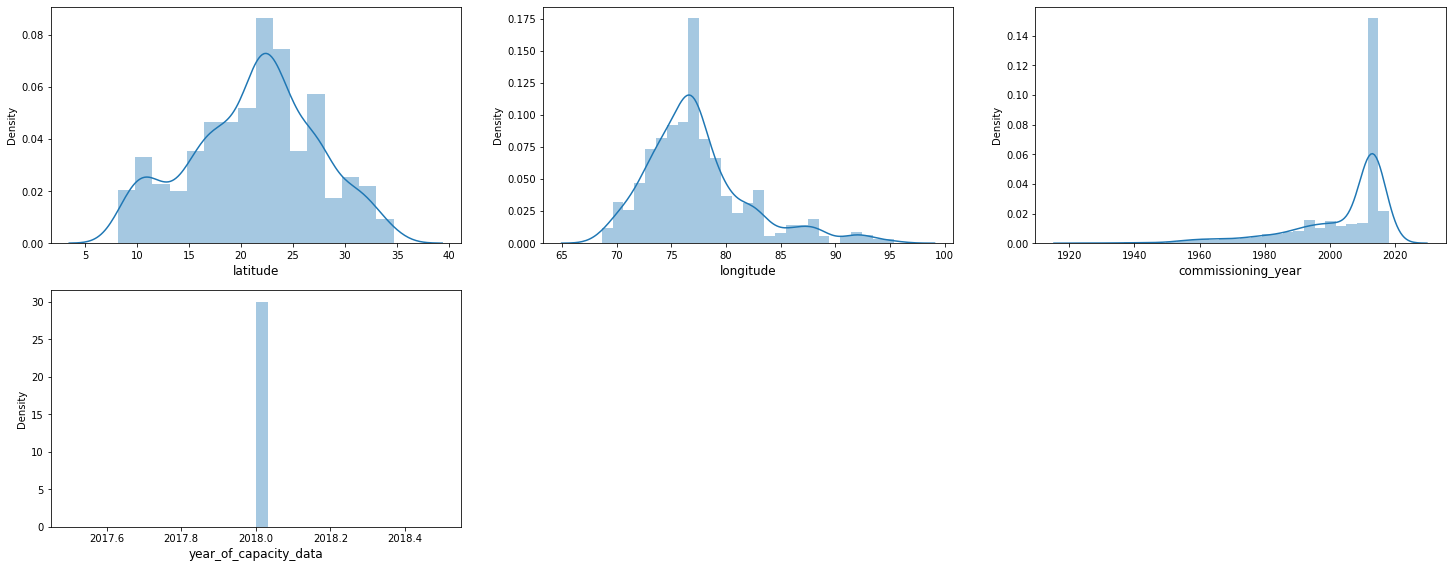

In [350]:
#checking the data distrubution using the distribution plot.
plt.figure(figsize=(25,20),facecolor='white')
pltnum=1

for column in df.iloc[:,[5,6,8,11]]:
    if pltnum <= 12:
        plt.subplot(4,3,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=12)
        
    pltnum +=1
plt.show()    

In [312]:
#there is very less outliers is visible in the features.the outliers are present in commissioning year and longitude feature
#we can cross check the same using the box plot.

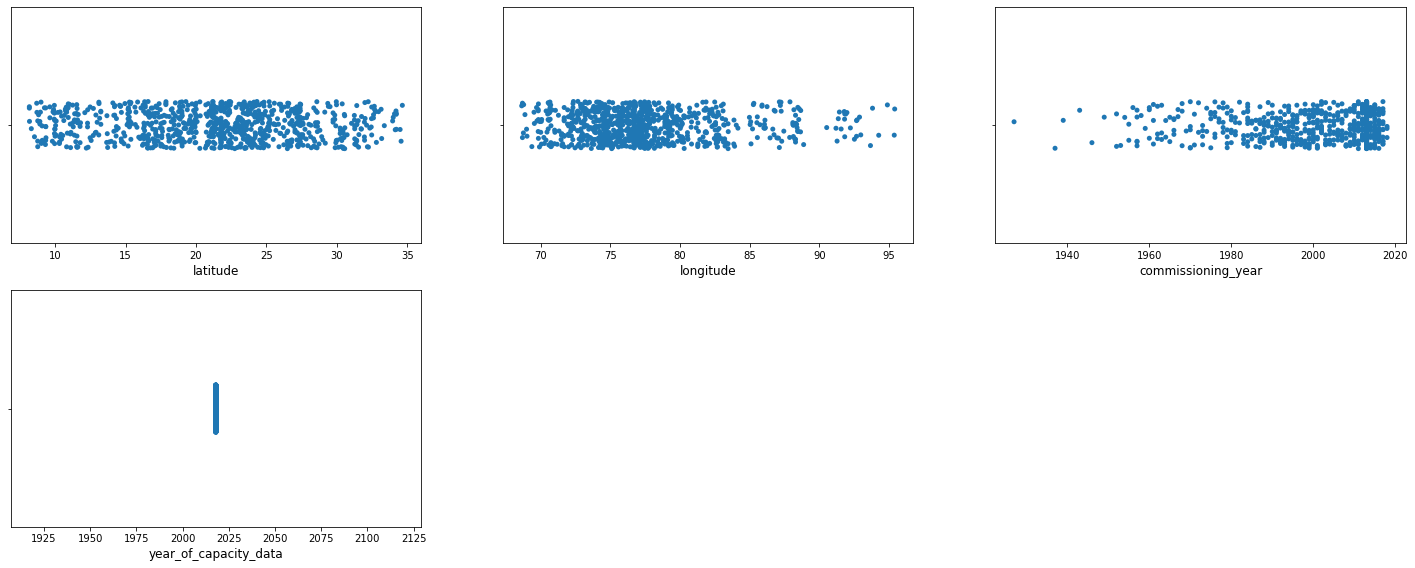

In [351]:
#checking the data distrubution using the Strip plot.
plt.figure(figsize=(25,20),facecolor='white')
pltnum=1

for column in df.iloc[:,[5,6,8,11]]:
    if pltnum <= 12:
        plt.subplot(4,3,pltnum)
        sns.stripplot(df[column])
        plt.xlabel(column,fontsize=12)
        
    pltnum +=1
plt.show()    

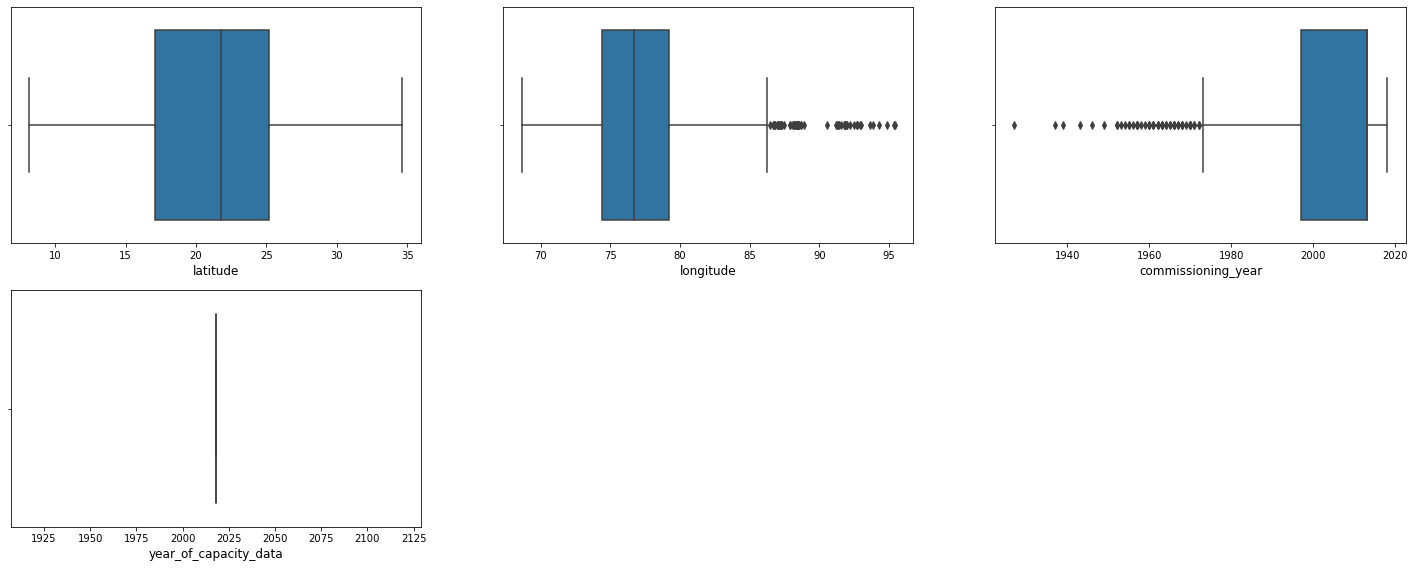

In [352]:
#using box plot to check the outliers in the feature.
plt.figure(figsize=(25,20),facecolor='white')
pltnum=1

for column in df.iloc[:,[5,6,8,11]]:
    if pltnum <= 12:
        plt.subplot(4,3,pltnum)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=12)
        
    pltnum +=1
plt.show()    

In [353]:
#the outliers are available in the features so we can use z-score to to remove the outliers.

In [354]:
z=np.abs(stats.zscore(df.iloc[:,[6,8]]))
index=np.where(z > 3)[0]

In [355]:
len(index)

37

In [356]:
df.shape

(908, 15)

In [357]:
#dropping the outlier index
df=df.drop(df.index[index])

In [358]:
#Data Loss
loss_percentage=(908-872)/614*100
print(loss_percentage)

5.863192182410423


In [321]:
#using the quantile method
#q1=df.iloc[:,[6,8]].quantile(0.25)

#q3=df.iloc[:,[6,8]].quantile(0.75)

#iqr= q3 - q1

In [322]:
#for column in df.iloc[:,[6]]:
#    index1=np.where(df[column] > (q3[column] + (1.5 * iqr[column])))
    
#for column in df.iloc[:,[8]]:
#    index1=np.where(df[column] < (q3[column] - (1.5 * iqr[column])))    

In [323]:
#dropping the outlier index
#df=df.drop(df.index[index1])

In [359]:
#checking the new shape
#df.shape

In [360]:
#Data Loss
#loss_percentage=(908-772)/614*100
#print(loss_percentage)

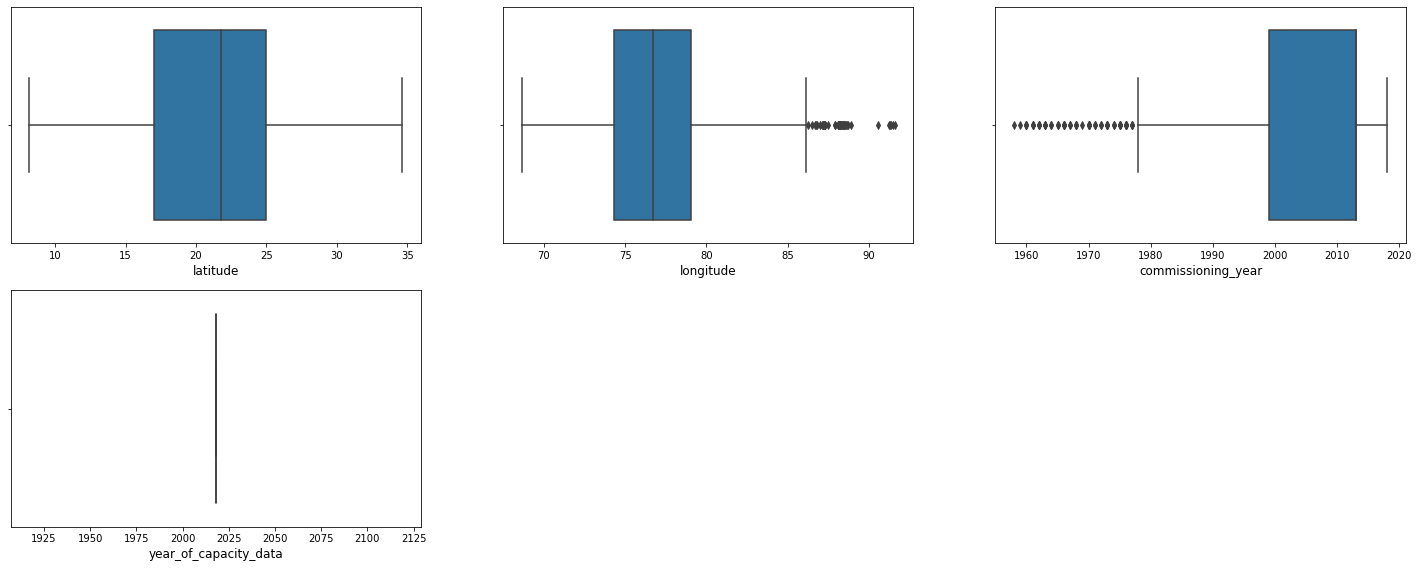

In [361]:
#using box plot to check the outliers in the feature.
plt.figure(figsize=(25,20),facecolor='white')
pltnum=1

for column in df.iloc[:,[5,6,8,11]]:
    if pltnum <= 12:
        plt.subplot(4,3,pltnum)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=12)
        
    pltnum +=1
plt.show()    

In [362]:
#checking the skewness and correlation between the featues and one target capacity_mw
df_corr=df.iloc[:,[4,5,6,8]].corr()
df_corr['capacity_mw'].sort_values(ascending=False)

capacity_mw           1.000000
longitude             0.263013
latitude              0.052481
commissioning_year   -0.030556
Name: capacity_mw, dtype: float64

In [ ]:
#there is no skewness looks as the range is between -0.5 to +0.5

In [363]:
#checking the skewness and correlation between the featues and one target primary_fuel
df_corr=df.iloc[:,[5,6,7,8]].corr()
df_corr['primary_fuel'].sort_values(ascending=False)

primary_fuel          1.000000
commissioning_year    0.159868
latitude             -0.005780
longitude            -0.394562
Name: primary_fuel, dtype: float64

In [ ]:
#there is no skewness looks as the range is between -0.5 to +0.5

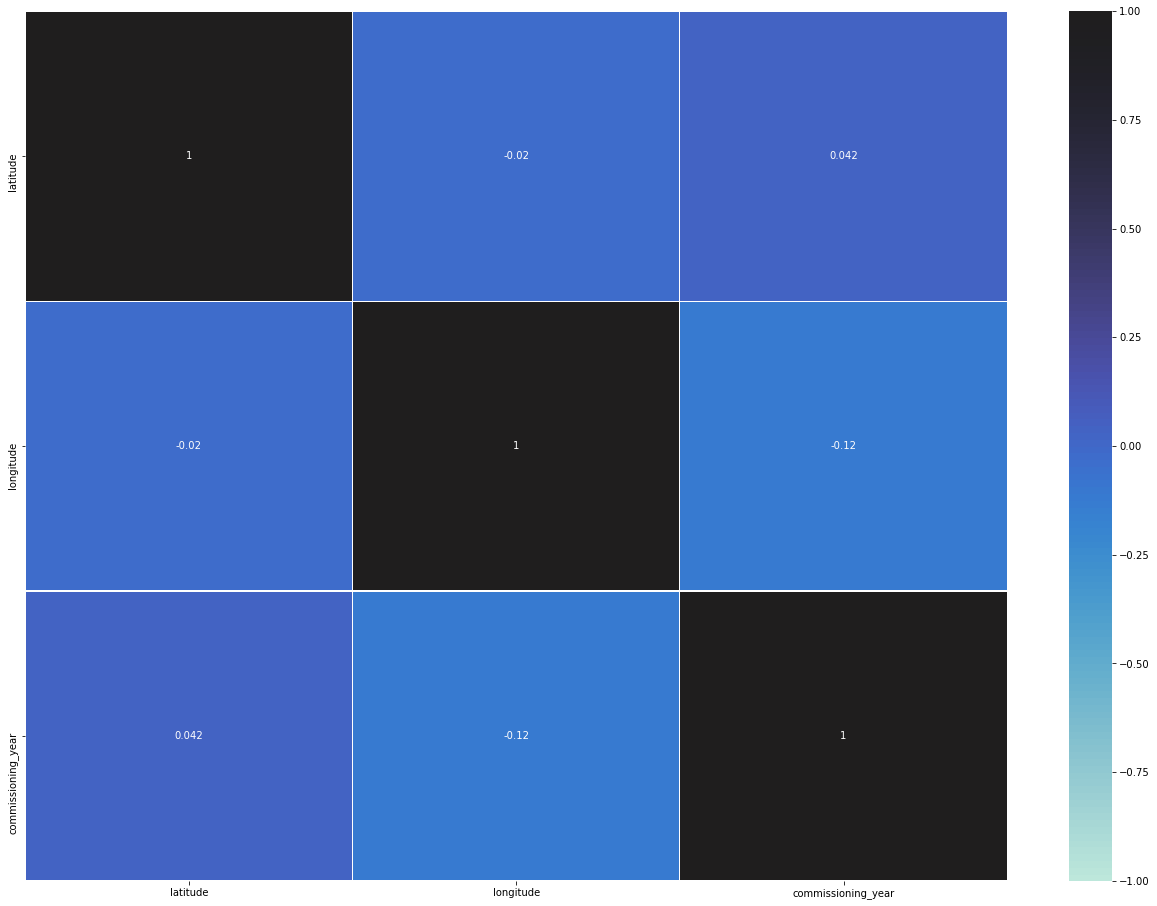

In [364]:
#using the heatmap to check the correlation between features.
corr_matrix=df.iloc[:,[5,6,8]].abs().corr()

plt.figure(figsize=(22,16))

sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=True,annot=True, fmt='.2g',linewidths=0.1)
plt.show()

#as we can see in heatmap there is no correlation between the features and labels

In [ ]:
#from the heatmap,there is no multicollinearity issue looks like in betwenn the features.

In [365]:
data_var=['latitude','longitude','commissioning_year','year_of_capacity_data']
features=df[data_var]

In [366]:
#using the standerd scalar for scaling the data
scalar=StandardScaler()
x_data=scalar.fit_transform(features.values)

In [367]:
#assigning the  scaled data to features
df[['latitude','longitude','commissioning_year','year_of_capacity_data']]=x_data

In [368]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,year_of_capacity_data,geolocation_source_0,geolocation_source_1,geolocation_source_2
0,0,0,0,658,2.5,1.159388,-0.895516,6,0.462871,109,128,0.0,0,1,0
1,0,0,1,520,98.0,0.596235,-0.573973,1,0.613899,174,173,0.0,0,0,1
2,0,0,2,854,39.2,0.124552,-1.804359,7,0.613899,21,205,0.0,0,0,1
3,0,0,3,0,135.0,0.448740,3.362474,2,-0.065729,22,58,0.0,0,0,1
4,0,0,4,1,1800.0,0.133862,1.259011,1,0.764927,22,58,0.0,0,0,1


In [ ]:
#now sepraating the independent features and target for capacity_mw
x1=df.drop(columns=['primary_fuel','capacity_mw'],axis=1)
y1=df['capacity_mw']

In [371]:
df['capacity_mw'].value_counts()

5.000       37
10.000      21
600.000     21
15.000      19
1200.000    19
1.000       18
20.000      18
30.000      16
50.000      14
500.000     14
100.000     13
25.000      11
300.000     11
60.000      11
24.000      11
1000.000    10
16.000       9
120.000      9
9.000        8
12.000       8
90.000       8
3.000        8
240.000      7
36.000       7
10.500       7
6.000        7
40.000       7
250.000      7
50.400       7
1320.000     6
150.000      6
75.000       6
21.000       6
2.000        6
16.500       6
270.000      5
18.000       5
22.500       5
35.000       5
4.000        5
440.000      5
22.000       5
540.000      4
1340.000     4
135.000      4
125.000      4
2000.000     4
1050.000     4
45.000       4
25.500       4
1500.000     4
330.000      4
80.000       4
630.000      4
210.000      4
1080.000     3
28.000       3
180.000      3
400.000      3
1980.000     3
46.000       3
1.500        3
11.200       3
6.600        3
96.000       3
99.000       3
660.000   

In [ ]:
#It target variable is continious data so it is a reggresoion solution.

In [374]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.25,random_state=i)
    lr=RandomForestRegressor()
    lr.fit(x_train1,y_train1)
    y_pred1=lr.predict(x_test1)
    acc_r2=r2_score(y_test1,y_pred1)
    if acc_r2 > maxAcc:
        maxAcc=acc_r2
        maxRs=i
        
print(f"Best Accuracy is : {maxAcc* 100:.2f}%")
print("The Best Random State is :",maxRs)     

Best Accuracy is : 52.80%
The Best Random State is : 140


In [375]:
#seprating the train and test datasets with the best find random state
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.25,random_state =140)

In [377]:
#model Evaluation for LR:
print('\n==========Model Evaluaton and Accuracy check using LinearRegression===========')
lr=LinearRegression()
lr.fit(x_train1,y_train1)
y_predlr=lr.predict(x_test1)
print(f"The accuracy of the model using LinearRegression is: {r2_score(y_test1,y_predlr)*100:.2f}%\n")



#model Evaluation for KNN:
print('\n==========Model Evaluaton and Accuracy check using KNeighborsRegressor===========')
knn=KNeighborsRegressor()
knn.fit(x_train1,y_train1)
y_predknn=knn.predict(x_test1)
print(f"The accuracy of the model using KNeighborsRegressor is: {r2_score(y_test1,y_predknn)*100:.2f}%\n")



#model Evaluation for RandomForestRegressor:
print('\n==========Model Evaluaton and Accuracy check using RandomForestRegressor===========')
rfr=RandomForestRegressor()
rfr.fit(x_train1,y_train1)
y_predrfr=rfr.predict(x_test1)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test1,y_predrfr)*100:.2f}%\n")



#model Evaluation for AdaBoostRegressor:
print('\n==========Model Evaluaton and Accuracy check using AdaBoostRegressor===========')
ada=AdaBoostRegressor()
ada.fit(x_train1,y_train1)
y_predada=ada.predict(x_test1)
print(f"The accuracy of the model using AdaBoostRegressor is: {r2_score(y_test1,y_predada)*100:.2f}%\n")



#model Evaluation for SVR:
print('\n===============Model Evaluaton and Accuracy check using SVR====================')
svr=SVR()
svr.fit(x_train1,y_train1)
y_predsvr=svr.predict(x_test1)
print(f"The accuracy of the model using SVR is: {r2_score(y_test1,y_predsvr)*100:.2f}%\n")


==========Model Evaluaton and Accuracy check using LinearRegression===========
The accuracy of the model using LinearRegression is: 22.56%


==========Model Evaluaton and Accuracy check using KNeighborsRegressor===========
The accuracy of the model using KNeighborsRegressor is: 18.43%


==========Model Evaluaton and Accuracy check using RandomForestRegressor===========
The accuracy of the model using RandomForestRegressor is: 51.38%


==========Model Evaluaton and Accuracy check using AdaBoostRegressor===========
The accuracy of the model using AdaBoostRegressor is: 15.17%


===============Model Evaluaton and Accuracy check using SVR====================
The accuracy of the model using SVR is: -9.60%



In [378]:
print('\n=============Cross Validation Score of Linear Reggression==============')
cvs_lr=cross_val_score(lr,x1,y1,cv=5)
print(f"Cross validation for the Linear Reggression is: {cvs_lr.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of KNeighborsRegressor==============')
cvs_knn=cross_val_score(knn,x1,y1,cv=5)
print(f"Cross validation for the KNeighborsRegressor is: {cvs_knn.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Random Forest Regressor===========')
cvs_rfr=cross_val_score(rfr,x1,y1,cv=5)
print(f"Cross validation for the Random Forest Regressor is: {cvs_rfr.mean()*100:.2f}%\n")

print('\n============Cross Validation Score of AdaBoostRegressor===================')
cvs_ada=cross_val_score(ada,x1,y1,cv=5)
print(f"Cross validation for the AdaBoostRegressor is: {cvs_ada.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVR========================')
cvs_svr=cross_val_score(svr,x1,y1,cv=5)
print(f"Cross validation for the KNN Classifier is: {cvs_svr.mean()*100:.2f}%\n")


=============Cross Validation Score of Linear Reggression==============
Cross validation for the Linear Reggression is: 19.72%


=============Cross Validation Score of KNeighborsRegressor==============
Cross validation for the KNeighborsRegressor is: -43.08%


==========Cross Validation Score of Random Forest Regressor===========
Cross validation for the Random Forest Regressor is: 13.18%


============Cross Validation Score of AdaBoostRegressor===================
Cross validation for the AdaBoostRegressor is: -43.20%


===================Cross Validation Score of SVR========================
Cross validation for the KNN Classifier is: -14.93%



In [379]:
#Regularation Process
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [381]:
# Lasso model
print('\n==========Accuracy of Lasso===========')
le=Lasso(alpha=0.0001)
le.fit(x_train1,y_train1)
predictlasso = le.predict(x_test1)
le.score(x_train1,y_train1)
print(f"The accuracy of the model using Lasso is: {r2_score(y_test1,predictlasso)*100:.2f}%\n")


# Ridge model
print('\n==========Accuracy of Ridge===========')
rg =Ridge(alpha=0.0001)
rg.fit(x_train1,y_train1)
rg.score(x_train1,y_train1)
predictridge = rg.predict(x_test1)
print(f"The accuracy of the model using Ridge is: {r2_score(y_test1,predictridge)*100:.2f}%\n")


# Elastic model
print('\n==========Accuracy of Elastic===========')
el=ElasticNet(alpha=0.0001)
el.fit(x_train1,y_train1)
el.score(x_train1,y_train1)
predictel = el.predict(x_test1)
print(f"The accuracy of the model using ElasticNet is: {r2_score(y_test1,predictel)*100:.2f}%\n")


==========Accuracy of Lasso===========
The accuracy of the model using Lasso is: 22.56%


==========Accuracy of Ridge===========
The accuracy of the model using Ridge is: 22.56%


==========Accuracy of Elastic===========
The accuracy of the model using ElasticNet is: 22.56%



In [382]:
print('\n==========Cross Validation Score of Lasso===========')
cvs_le=cross_val_score(le,x1,y1,cv=5)
print(f"Cross validation for the LASSO is: {cvs_le.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Ridge===========')
cvs_rg=cross_val_score(rg,x1,y1,cv=5)
print(f"Cross validation for the Ridge is: {cvs_rg.mean()*100:.2f}%\n")


print('\n==========Cross Validation Score of ElasticNet===========')
cvs_el=cross_val_score(el,x1,y1,cv=5)
print(f"Cross validation for the ElasticNet is: {cvs_el.mean()*100:.2f}%\n")


==========Cross Validation Score of Lasso===========
Cross validation for the LASSO is: 19.72%


==========Cross Validation Score of Ridge===========
Cross validation for the Ridge is: 19.72%


==========Cross Validation Score of ElasticNet===========
Cross validation for the ElasticNet is: 19.72%



In [ ]:
#As we can see that the result of r2 accuracy and cross validation score of all the models.
#LinearReggression:22.56%
#Cross Validation Score:19.72%
#Diffrence:2.84

#KNeighborsRegressor:18.43%
#Cross Validation Score: -43.08%
#Diffrence:61.51

#Random Forest Regressor:51.38%
#Cross Validation Score:13.18%
#Diffrence:38.2

#AdaBoostRegressor:15.17%
#Cross Validation Score:-43.20%
#Diffrence:28.03

#SVR:-9.60%
#Cross Validation Score:-14.93%
#Diffrence:24.53

#LASSO:22.56%
#Cross Validation Score:19.72%
#Diffrence:2.84

#Ridge:22.56%
#Cross Validation Score:19.72%
#Diffrence:2.84

#ElasticNet:22.56%
#Cross Validation Score:19.72%
#Diffrence:2.84

In [418]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param1={'n_estimators':[90,100,110],
           'max_depth':[10,12,15],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[2,4,6]}

In [419]:
gridcv=GridSearchCV(rfr,param_grid=best_param1)

In [420]:
gridcv.fit(x_train1,y_train1)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 15],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [90, 100, 110]})

In [421]:
gridcv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 90}

In [425]:
#model Evaluation for RandomForestRegressor:
print('\n==========Model Evaluaton and Accuracy check using RandomForestRegressor===========')
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=6,min_samples_split=2,n_estimators=90)
rfr.fit(x_train1,y_train1)
y_predrfr=rfr.predict(x_test1)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test1,y_predrfr)*100:.2f}%\n")


==========Model Evaluaton and Accuracy check using RandomForestRegressor===========
The accuracy of the model using RandomForestRegressor is: 37.20%



In [426]:
#model Evaluation for RandomForestRegressor:
print('\n==========Model Evaluaton and Accuracy check using RandomForestRegressor===========')
rfr=RandomForestRegressor()
rfr.fit(x_train1,y_train1)
y_predrfr=rfr.predict(x_test1)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test1,y_predrfr)*100:.2f}%\n")


==========Model Evaluaton and Accuracy check using RandomForestRegressor===========
The accuracy of the model using RandomForestRegressor is: 53.31%



In [428]:
#Saving the model
import joblib

In [429]:
joblib.dump(rfr,'Global_Power_Plant_Model1.pkl')

['Global_Power_Plant_Model1.pkl']

In [383]:
#now sepraating the independent features and target for primary_fuel
x2=df.drop(columns=['primary_fuel','capacity_mw'],axis=1)
y2=df['primary_fuel']

In [384]:
#now checking the imbalanced problem of the target column.
y2.value_counts()

1    259
3    219
6    126
7    123
2     65
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

In [ ]:
#the output has categorial data so it is a classification problem.

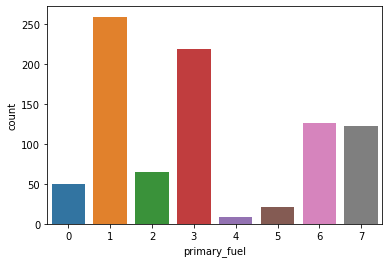

In [385]:
#plotting the count plot on target data
sns.countplot(x='primary_fuel',data=df)
plt.show()

In [386]:
#handling class imbalanced problem by oversampling the minority class using SMOTE:
from imblearn.over_sampling import SMOTE

In [387]:
#using the SMOTE to solve the imbalanced problem
SM=SMOTE()
x_fit,y_fit=SM.fit_resample(x2,y2)

In [388]:
#new the issue of class imbalanced problem has been solved.
y_fit.value_counts()

7    259
5    259
3    259
1    259
6    259
4    259
2    259
0    259
Name: primary_fuel, dtype: int64

In [394]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train2,x_test2,y_train2,y_test2=train_test_split(x_fit,y_fit,test_size=0.25,random_state=i)
    dt=LogisticRegression()
    dt.fit(x_train2,y_train2)
    y_pred2=dt.predict(x_test2)
    acc_s=accuracy_score(y_test2,y_pred2)
    if acc_s > maxAcc:
        maxAcc=acc_s
        maxRs=i
        
print(f"Best Accuracy is : {maxAcc* 100:.2f}%")
print("The Best Random State is :",maxRs)

Best Accuracy is : 49.61%
The Best Random State is : 124


In [395]:
#seprating the train and test datasets with the best find random state
x_train2,x_test2,y_train2,y_test2=train_test_split(x_fit,y_fit,test_size=0.25,random_state=124)

In [396]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
lr=LogisticRegression()
lr.fit(x_train2,y_train2)
y_predlr=lr.predict(x_test2)

print('\n==========Outputs of Logistics Reggression===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test2,y_predlr)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test2,y_predlr,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test2,y_predlr))


==========Outputs of Logistics Reggression===========

==========Accuracy Score===========
Accuracy Score is : 49.61%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.74      0.57      0.64        65
           1       0.57      0.05      0.10        75
           2       0.25      0.02      0.03        55
           3       0.36      0.62      0.45        71
           4       0.32      0.77      0.45        61
           5       0.25      0.06      0.10        62
           6       0.55      0.85      0.67        62
           7       0.89      1.00      0.94        67

    accuracy                           0.50       518
   macro avg       0.49      0.49      0.42       518
weighted avg       0.50      0.50      0.43       518
 

=========Confusion Matrix============
[[37  0  1  0  0  6 21  0]
 [ 3  4  1 27 29  2  9  0]
 [ 2  0  1 18 24  4  4  2]
 [ 0  2  0 44 25  0  0  0]
 [ 0  0  0 14 47  0  0  0]
 [ 1  0  1 20

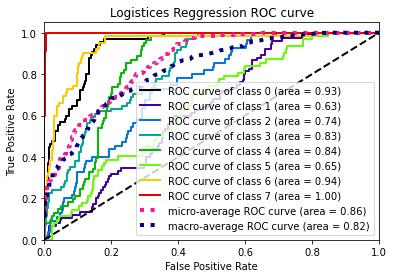

In [397]:
#plotting the roc auc curve for Logistics Reggression:
prob_ydt=lr.predict_proba(x_test2)
skplt.metrics.plot_roc(y_test2,prob_ydt)
plt.title('Logistices Reggression ROC curve')
plt.show()

In [398]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
dt=DecisionTreeClassifier()
dt.fit(x_train2,y_train2)
y_preddt=dt.predict(x_test2)

print('\n==========Outputs of DT===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test2,y_preddt)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test2,y_preddt,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test2,y_preddt))


==========Outputs of DT===========

==========Accuracy Score===========
Accuracy Score is : 80.89%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        65
           1       0.70      0.64      0.67        75
           2       0.61      0.62      0.61        55
           3       0.68      0.72      0.70        71
           4       0.81      0.77      0.79        61
           5       0.78      0.81      0.79        62
           6       0.98      1.00      0.99        62
           7       1.00      1.00      1.00        67

    accuracy                           0.81       518
   macro avg       0.81      0.81      0.81       518
weighted avg       0.81      0.81      0.81       518
 

=========Confusion Matrix============
[[60  5  0  0  0  0  0  0]
 [ 4 48 13  8  1  1  0  0]
 [ 1  8 34  5  1  5  1  0]
 [ 0  5  4 51  7  4  0  0]
 [ 1  0  1  8 47  4  0  0]
 [ 0  3  4  3  2 50  0  0]
 [ 0 

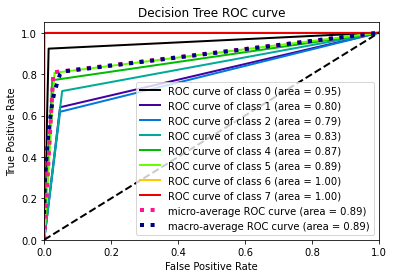

In [399]:
#plotting the roc auc curve for Decision Tree:
y_preddt=dt.predict_proba(x_test2)
skplt.metrics.plot_roc(y_test2,y_preddt)
plt.title('Decision Tree ROC curve')
plt.show()

In [400]:
#Using the AdaBoostClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
abc=AdaBoostClassifier()
abc.fit(x_train2,y_train2)
y_predabc=abc.predict(x_test2)

print('\n==========Outputs of ADA Boost===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test2,y_predabc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test2,y_predabc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test2,y_predabc))


==========Outputs of ADA Boost===========

==========Accuracy Score===========
Accuracy Score is : 38.22%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.62      0.95      0.75        65
           1       0.22      0.03      0.05        75
           2       0.23      0.29      0.26        55
           3       0.00      0.00      0.00        71
           4       0.26      0.18      0.21        61
           5       0.17      0.47      0.25        62
           6       0.56      1.00      0.72        62
           7       0.89      0.24      0.38        67

    accuracy                           0.38       518
   macro avg       0.37      0.39      0.33       518
weighted avg       0.37      0.38      0.32       518
 

=========Confusion Matrix============
[[62  0  3  0  0  0  0  0]
 [12  2 37  0  2 22  0  0]
 [ 8  0 16  0  5 26  0  0]
 [ 0  1 13  0  8 49  0  0]
 [ 0  6  1  0 11 41  0  2]
 [18  0  0  0 15 29  0  0

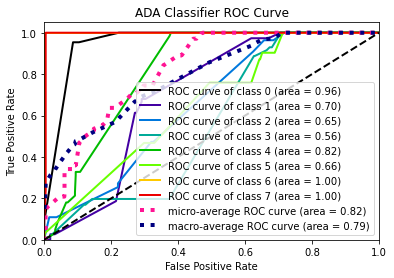

In [401]:
#plotting the roc auc curve for ADA Classifier:
y_predabc=abc.predict_proba(x_test2)
skplt.metrics.plot_roc(y_test2,y_predabc)
plt.title('ADA Classifier ROC Curve')
plt.show()

In [402]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

rfc=RandomForestClassifier()
rfc.fit(x_train2,y_train2)
y_predrfc=rfc.predict(x_test2)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test2,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test2,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test2,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 85.91%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        65
           1       0.77      0.64      0.70        75
           2       0.79      0.75      0.77        55
           3       0.74      0.72      0.73        71
           4       0.83      0.93      0.88        61
           5       0.79      0.94      0.86        62
           6       1.00      1.00      1.00        62
           7       1.00      1.00      1.00        67

    accuracy                           0.86       518
   macro avg       0.86      0.86      0.86       518
weighted avg       0.86      0.86      0.86       518
 

=========Confusion Matrix============
[[61  4  0  0  0  0  0  0]
 [ 2 48  7 14  0  4  0  0]
 [ 1  4 41  1  4  4  0  0]
 [ 0  6  4 51  7  3  0  0]
 [ 0  0  0  0 57  4  0  0]
 [ 0  0  0

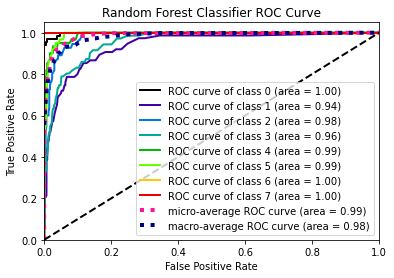

In [403]:
#plotting the roc auc curve for Random Forest Classifier:
y_predrfc=rfc.predict_proba(x_test2)
skplt.metrics.plot_roc(y_test2,y_predrfc)
plt.title('Random Forest Classifier ROC Curve')
plt.show()

In [404]:
#Using the KNeighborsClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

knn=KNeighborsClassifier()
knn.fit(x_train2,y_train2)
y_predknn=knn.predict(x_test2)

print('\n==========Outputs of KNeighborsClassifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test2,y_predknn)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test2,y_predknn,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test2,y_predknn))


==========Outputs of KNeighborsClassifier===========

==========Accuracy Score===========
Accuracy Score is : 62.55%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        65
           1       0.37      0.27      0.31        75
           2       0.38      0.64      0.48        55
           3       0.42      0.35      0.38        71
           4       0.53      0.44      0.48        61
           5       0.51      0.48      0.50        62
           6       1.00      0.97      0.98        62
           7       0.94      1.00      0.97        67

    accuracy                           0.63       518
   macro avg       0.62      0.63      0.62       518
weighted avg       0.62      0.63      0.62       518
 

=========Confusion Matrix============
[[60  0  1  0  0  4  0  0]
 [ 9 20 22  9  6  8  0  1]
 [ 3  6 35  3  3  5  0  0]
 [ 0 16 17 25 10  3  0  0]
 [ 0  5  7 12 27  8  0  2]
 [ 1  7  9 10 

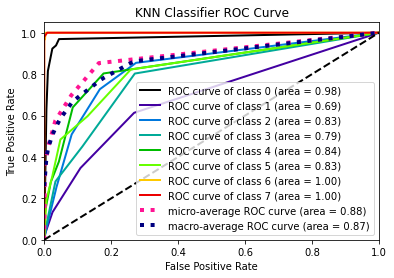

In [405]:
#plotting the roc auc curve for KNN Classifier:
y_predknn=knn.predict_proba(x_test2)
skplt.metrics.plot_roc(y_test2,y_predknn)
plt.title('KNN Classifier ROC Curve')
plt.show()

In [406]:
#Using the SVC algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

#svc=SVC(probability=True)
svc=SVC(probability=True)
svc.fit(x_train2,y_train2)
y_predsvc=svc.predict(x_test2)

print('\n==========Outputs of SVC===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test2,y_predsvc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test2,y_predsvc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test2,y_predsvc))


==========Outputs of SVC===========

==========Accuracy Score===========
Accuracy Score is : 55.21%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        65
           1       1.00      0.01      0.03        75
           2       0.41      0.16      0.23        55
           3       0.35      0.54      0.42        71
           4       0.35      0.79      0.49        61
           5       0.00      0.00      0.00        62
           6       1.00      0.94      0.97        62
           7       0.94      1.00      0.97        67

    accuracy                           0.55       518
   macro avg       0.57      0.55      0.48       518
weighted avg       0.59      0.55      0.47       518
 

=========Confusion Matrix============
[[65  0  0  0  0  0  0  0]
 [16  1  3 28 26  0  0  1]
 [12  0  9 16 18  0  0  0]
 [ 1  0  5 38 27  0  0  0]
 [ 3  0  3  5 48  0  0  2]
 [20  0  2 23 17  0  0  0]
 [ 3

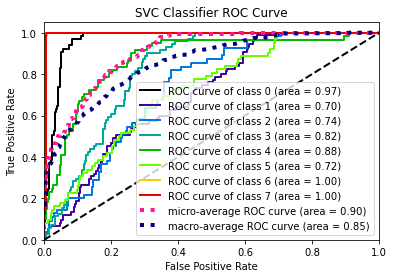

In [407]:
#plotting the roc auc curve for SVC:
y_predsvc=svc.predict_proba(x_test2)
skplt.metrics.plot_roc(y_test2,y_predsvc)
plt.title('SVC Classifier ROC Curve')
plt.show()

In [408]:
print('\n==========Cross Validation Score of Logistices Classifier===========')
cvs_lr=cross_val_score(lr,x_fit,y_fit,cv=5)
print(f"Cross validation for the Logistices Classifier is: {cvs_lr.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Random Forest Classifier===========')
cvs_rfc=cross_val_score(rfc,x_fit,y_fit,cv=5)
print(f"Cross validation for the Random Forest Classifier is: {cvs_rfc.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of Decision Tree====================')
cvs_dt=cross_val_score(dt,x_fit,y_fit,cv=5)
print(f"Cross validation for the Decision Tree is: {cvs_dt.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of AdaBoost Classifier==============')
cvs_abc=cross_val_score(abc,x_fit,y_fit,cv=5)
print(f"Cross validation for the AdaBoost Classifier is: {cvs_abc.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of KNN========================')
cvs_knn=cross_val_score(knn,x_fit,y_fit,cv=5)
print(f"Cross validation for the KNN Classifier is: {cvs_knn.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVC========================')
cvs_svc=cross_val_score(svc,x_fit,y_fit,cv=5)
print(f"Cross validation for the SVC Classifier is: {cvs_svc.mean()*100:.2f}%\n")


==========Cross Validation Score of Logistices Classifier===========
Cross validation for the Logistices Classifier is: 41.41%


==========Cross Validation Score of Random Forest Classifier===========
Cross validation for the Random Forest Classifier is: 82.72%


=============Cross Validation Score of Decision Tree====================
Cross validation for the Decision Tree is: 76.74%


=============Cross Validation Score of AdaBoost Classifier==============
Cross validation for the AdaBoost Classifier is: 44.26%


===================Cross Validation Score of KNN========================
Cross validation for the KNN Classifier is: 58.11%


===================Cross Validation Score of SVC========================
Cross validation for the SVC Classifier is: 49.62%



In [ ]:
#As we can see that the result of Accuracy Score and cross validation score of all the models.
#Logistices Reggression:49.61%
#Cross Validation Score:41.41%
#Diffrence:8.2

#DesionTree Classifier:80.89%
#Cross Validation Score:76.74%
#Diffrence:4.15

#ADA Boost Classifier:38.22%
#Cross Validation Score:44.26%
#Diffrence:-6.04

#Random forest Classication:85.91%
#Cross Validation Score:82.72%
#Diffrence:3.19

#KNN Classifier:62.55%
#Cross Validation Score:44.26%
#Diffrence:18.29

#SVC:55.21%
#Cross Validation Score:49.62%
#Diffrence:5.59

#Random Forest Classifier is best model here with least diffrence and highest accuracy.
#So we will use Random Forest Regressor for the hyper parameter tuning.

In [ ]:
#now performing the hyper parameter tuning using gridsearchcv

In [409]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param={'n_estimators':[80,90,100],
           'criterion':['gini','entropy'],
           'max_depth':[10,12,15],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[2,4,6]}

In [410]:
gridcv=GridSearchCV(rfc,param_grid=best_param)

In [411]:
gridcv.fit(x_train2,y_train2)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [80, 90, 100]})

In [412]:
gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [166]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

rfc=RandomForestClassifier(criterion='gini',max_depth=15,min_samples_leaf=2,min_samples_split=3,n_estimators=100)
rfc.fit(x_train2,y_train2)
y_predrfc=rfc.predict(x_test2)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test2,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test2,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test2,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 87.84%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        65
           1       0.72      0.68      0.70        60
           2       0.82      0.73      0.77        55
           3       0.89      0.64      0.74        66
           4       0.81      1.00      0.90        66
           5       0.86      0.94      0.90        68
           6       1.00      1.00      1.00        76
           7       1.00      1.00      1.00        62

    accuracy                           0.88       518
   macro avg       0.87      0.87      0.87       518
weighted avg       0.88      0.88      0.87       518
 

=========Confusion Matrix============
[[64  1  0  0  0  0  0  0]
 [ 6 41  6  4  2  1  0  0]
 [ 2  4 40  1  2  6  0  0]
 [ 0 11  1 42  9  3  0  0]
 [ 0  0  0  0 66  0  0  0]
 [ 0  0  2

In [ ]:
#after the Hyper parameter tuning also accuracy get increased 87.84..so we are saving the model with hyper parameter tuning.

In [413]:
#here Random Forest Classifier is our best model to provide the highest accuracy.

In [427]:
#Saving the model
import joblib
joblib.dump(rfc,'Global_Power_Plant_Model2.pkl')

['Global_Power_Plant_Model2.pkl']

In [ ]:
#this complete the model building.